In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#get stock data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv')
df.head()

,minute,ticker,instrument_token,open,high,low,close
0,2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
1,2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2,2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
3,2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
4,2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [3]:
#change to datetime format
df['minute']=pd.to_datetime(df.minute)
df.shape

(1478, 7)

In [4]:
#check null entries
df.isnull().sum()

minute              0
ticker              0
instrument_token    0
open                0
high                0
low                 0
close               0
dtype: int64

In [5]:
#check if any na
df.isna().any()

minute              False
ticker              False
instrument_token    False
open                False
high                False
low                 False
close               False
dtype: bool

In [6]:
#information of stocck data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   minute            1478 non-null   datetime64[ns, pytz.FixedOffset(330)]
 1   ticker            1478 non-null   object                               
 2   instrument_token  1478 non-null   object                               
 3   open              1478 non-null   float64                              
 4   high              1478 non-null   float64                              
 5   low               1478 non-null   float64                              
 6   close             1478 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(4), object(2)
memory usage: 81.0+ KB


In [7]:
#describe stock
df.describe()

,open,high,low,close
count,1478.000000,1478.000000,1478.000000,1478.000000
mean,12703.472564,12766.196380,12618.730176,12695.129871
std,3013.301093,3022.293103,2991.077768,3008.326805
min,7732.100000,8036.950000,7511.100000,7634.600000
25%,10474.287500,10528.112500,10414.762500,10461.125000
50%,11510.075000,11563.775000,11437.850000,11501.800000
75%,15753.737500,15798.825000,15661.212500,15733.312500
max,18874.300000,18887.600000,18778.200000,18800.850000


<AxesSubplot:>

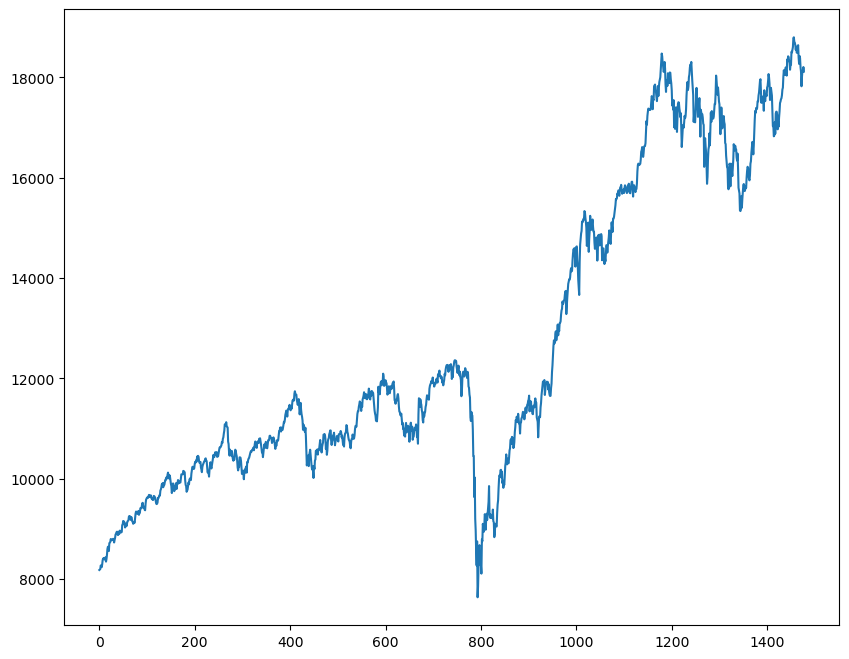

In [8]:
#plot close prices
df['close'].plot(figsize=(10,8))

In [9]:
#x and y variables independent
x=df[['open','low','high']]
y=df['close']

In [10]:
#divide into test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [11]:
print(x_train.shape,x_test.shape)

(1108, 3) (370, 3)


In [12]:
#get linear regressor, and train on x and y data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
#print regressor data
print(regressor.coef_)
print(regressor.intercept_)

[-0.67683549  0.81643795  0.86242607]
-18.242730933439816


In [14]:
#predict value against test
predicted=regressor.predict(x_test)
print(x_test)

          open       low      high
50     9133.50   9129.40   9158.10
1350  15914.95  15815.50  15927.45
497   10780.30  10733.25  10818.45
1287  17294.90  17076.55  17294.90
59     9129.30   9109.25   9152.35
...        ...       ...       ...
515   10845.35  10813.45  10983.45
287   10484.45  10461.55  10535.50
747   12345.75  12315.80  12389.05
1175  17867.95  17839.10  18041.95
689   11588.80  11554.40  11651.60

[370 rows x 3 columns]


In [15]:
predicted.shape

(370,)

In [16]:
#another dataframe to store original and predicted
_df= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})
print(_df)

      Actual Price  Predicted Price
50         9156.30      9151.653099
1350      15838.40     15858.576734
497       10788.60     10778.413539
1287      17179.45     17133.471201
59         9147.65      9133.085634
...            ...              ...
515       10894.65     10942.164016
287       10488.35     10512.805673
747       12354.05     12365.441679
1175      17954.95     18012.460776
689       11614.50     11620.140346

[370 rows x 2 columns]


In [17]:
#get the score
from sklearn.metrics import confusion_matrix,accuracy_score
regressor.score(x_test,y_test)

0.9997304379130404

In [18]:
#print accuracy
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Square Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 31.170976882030466
Mean Square Error: 2404.653749364542
Root Mean Square Error: 49.037268983544976


<AxesSubplot:>

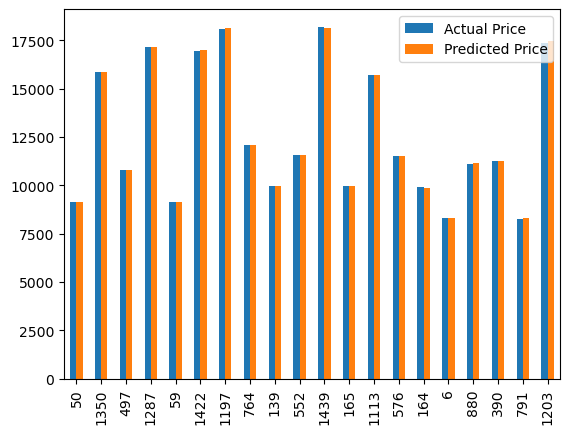

In [19]:
_df.head(20).plot(kind='bar')

In [20]:
#predict value against test
predicted=regressor.predict(x)
print(predicted)

[ 8146.92262062  8176.06815941  8197.66686545 ... 18160.41452704
 18170.01689401 18133.43086854]


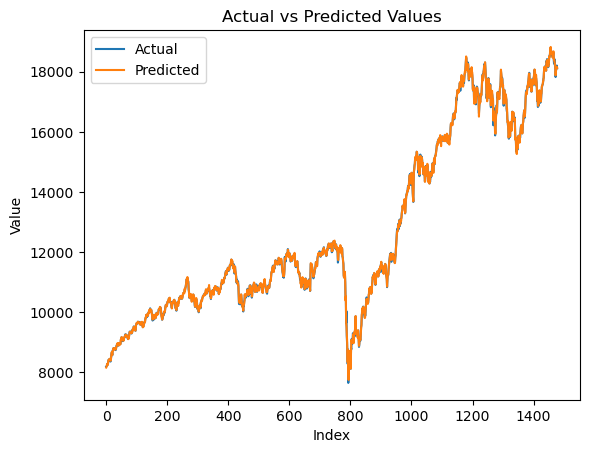

In [21]:
# Plot the actual vs predicted values
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()